In [1]:
import os
import shutil
import PIL.Image as Image
import pandas
import matplotlib.pyplot as plt
import numpy as np
import torch

# Analysis

In [2]:
list_size =[]
labels = os.listdir('./data/Training')
for label in labels:
    samples = os.listdir('./data/Training/'+label)
    for sample in samples:
        I=Image.open('./data/Training/'+label+'/'+sample)
        list_size.append(min(I.size))

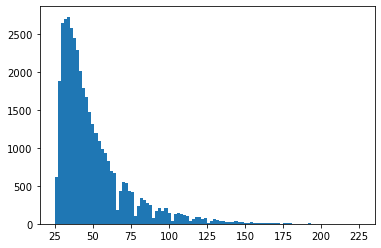

average_size = 49.239536841031395


In [3]:
plt.hist(list_size,bins=100)
plt.show()
print('average_size = {}'.format(np.asarray(list_size).mean()) )

# First  training ResNet50

In [4]:
history = torch.load('./checkpoint/history_epoch_100.pth.tar')

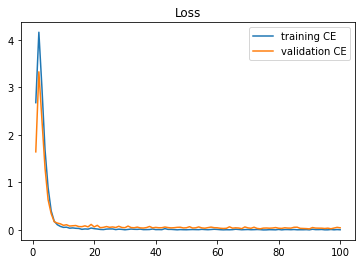

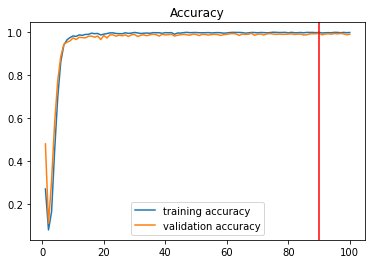

best accuracy = 90 epoch


In [5]:
plt.plot(range(1,101),history['training_losses'],label = 'training CE')
plt.plot(range(1,101),history['validation_losses'],label = 'validation CE')
plt.title('Loss')
plt.legend()
plt.show()

indexBest=history['validation_accuracy'].index(max(history['validation_accuracy']))
plt.plot(range(1,101),history['training_accuracy'],label = 'training accuracy')
plt.plot(range(1,101),history['validation_accuracy'],label = 'validation accuracy')
plt.title('Accuracy')
plt.axvline(x=indexBest+1,color='red')
plt.legend()
plt.show()
print('best accuracy = '+ str(indexBest+1)+' epoch')

In [1]:
from model import get_model
from test import evaluate
from data import create_data_loader

In [2]:
class Object():
    def __init__(self):
        pass
    
args = Object()
args.model = 'Resnet'
args.evaluate ='testing'
args.batch = 100
args.batch_test =10
args.model_dir = './checkpoint/best_model_CE_temperature_1.pth.tar'

In [3]:
args.evaluate ='validation'
evaluate(args)
args.evaluate ='testing'
evaluate(args)

Validation : loss : 0.031213177368044853  accuracy : 0.9913338422775269
Testing : loss : 0.3550637364387512  accuracy : 0.9369792342185974


In [9]:
_,_,test_loader = create_data_loader(args)

In [10]:
Model1 = get_model(args)
dico = torch.load('./checkpoint/best_model_CE_temperature_1.pth.tar')
Model1.load_state_dict(dico)

<All keys matched successfully>

In [11]:
list_pred =[]
list_target = []
list_proba = []
device = torch.device('cuda')
Model1.to(device)
for i,data in enumerate(test_loader):
    images, labels = data[0].to(device), data[1].to(device)
    with torch.no_grad():
        outputs = Model1(images)
        pred = torch.argmax(outputs,dim=1)
        list_pred.append(pred)
        list_target.append(labels)
        mask = torch.nn.functional.one_hot(labels,num_classes=43).bool()
        proba = outputs[mask]
        list_proba.append(proba)

In [12]:
pred = torch.cat(list_pred)
target = torch.cat(list_target)

In [13]:
pred = pred.cpu().numpy()
target = target.cpu().numpy()

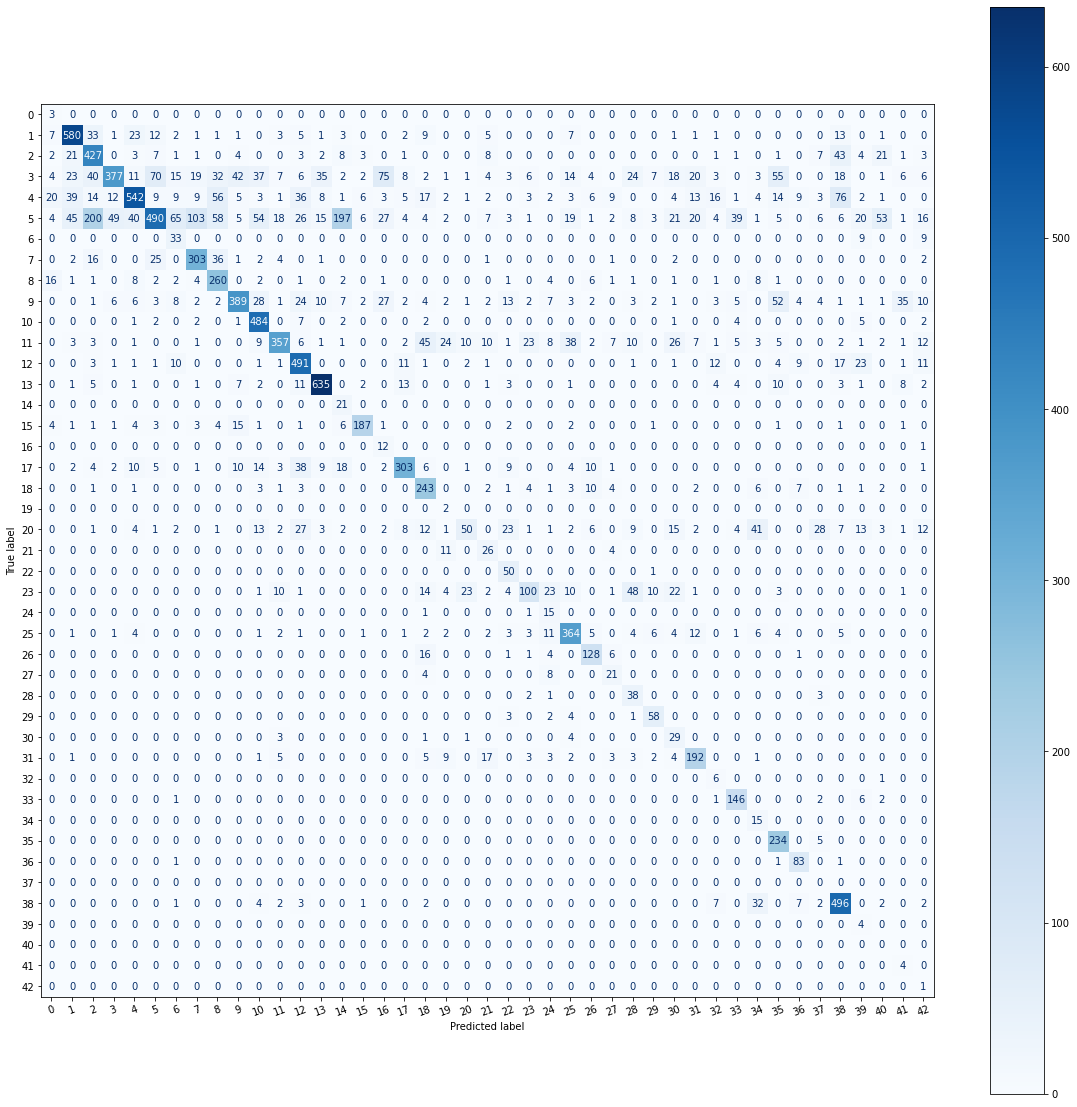

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def plot_confusion_matrix(target, pred, classes):
    
    fig = plt.figure(figsize = (20, 20));
    ax = fig.add_subplot(1, 1, 1);
    cm = confusion_matrix(pred, target);
    cm = ConfusionMatrixDisplay(cm, display_labels = classes);
    cm.plot(values_format = 'd', cmap = 'Blues', ax = ax)
    plt.xticks(rotation = 20)
    
labels_arr = range(0, 43)
plot_confusion_matrix(target,pred,labels_arr)

In [15]:
proba = torch.cat(list_proba)

In [16]:
proba = proba.cpu().numpy()

In [17]:
proba.sort()
min = proba[:5]